In [2]:
from shapely.geometry import polygon, linestring, point
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import fiona

C:\Users\RAMBABU\anaconda3\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


<AxesSubplot:>

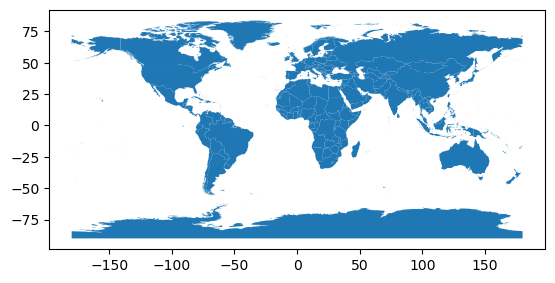

In [3]:
countries_polygon = gpd.read_file("ne_10m_admin_0_countries.shp")
countries_polygon.plot()

<AxesSubplot:>

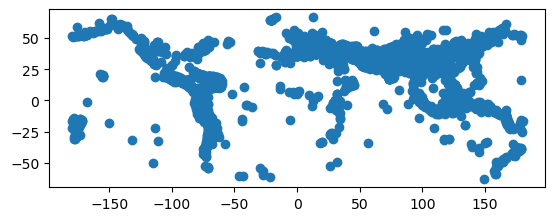

In [4]:
earthquake_point = gpd.read_file("earth_quake.shp")
earthquake_point.plot()

In [5]:
countries_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
earthquake_point.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 0.98, 'Earthquakes')

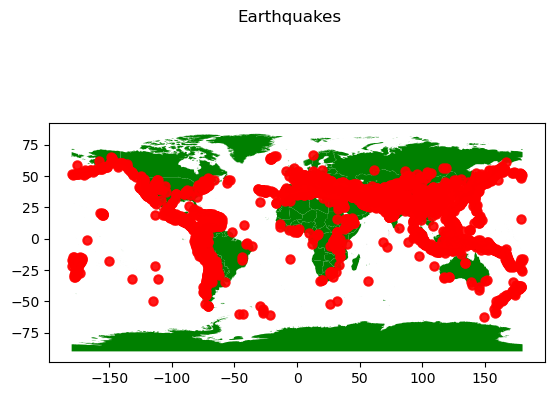

In [7]:
fig, ax =plt.subplots()
countries_polygon.plot(ax=ax, linewidth = 0.5, color ='green')
earthquake_point.plot(ax=ax, linewidth = 1.5,alpha =0.9, color ='red')
fig.suptitle('Earthquakes')

In [8]:
points_in_polygon = gpd.tools.sjoin(earthquake_point,countries_polygon, predicate = "within", how ='left')
points_in_polygon.to_csv("count.csv")

In [9]:
earthquake_country_wise = points_in_polygon.groupby(['COUNTRY'])['COUNTRY'].count()
earthquake_data_country_wise = earthquake_country_wise.to_frame()

In [10]:
earthquake_data_country_wise 

,COUNTRY
COUNTRY,
AFGHANISTAN,54
ALBANIA,53
ALGERIA,55
ANTARCTICA,4
ANTIGUA AND BARBUDA,3
...,...
VANUATU,51
VENEZUELA,62
VIETNAM,1


In [11]:
country_max_earthquakes = earthquake_data_country_wise.loc[earthquake_data_country_wise['COUNTRY'].idxmax()]
country_max_earthquakes

COUNTRY    574
Name: CHINA, dtype: int64

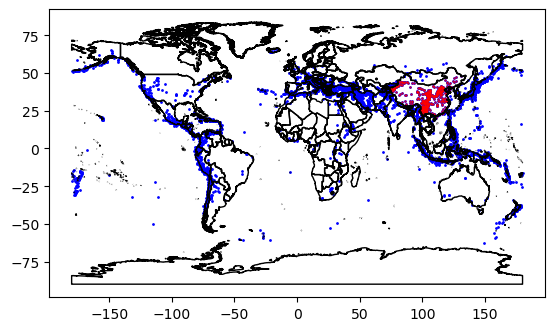

In [12]:
base = countries_polygon.boundary.plot(linewidth =1, edgecolor = "black")
EQ = earthquake_point[points_in_polygon.SOVEREIGNT == 'China']
earthquake_point.plot(ax=base, linewidth =1, color = "blue", markersize =1)
EQ.plot(ax=base, linewidth =1, color="red",markersize =0.2 )
plt.show()

<AxesSubplot:>

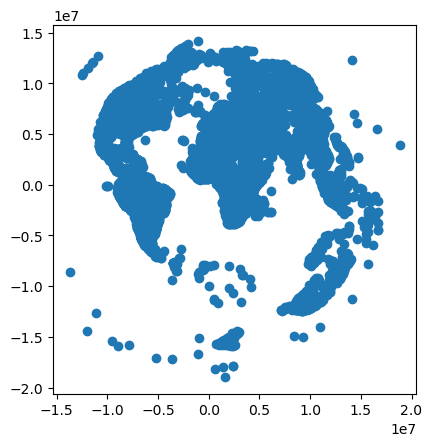

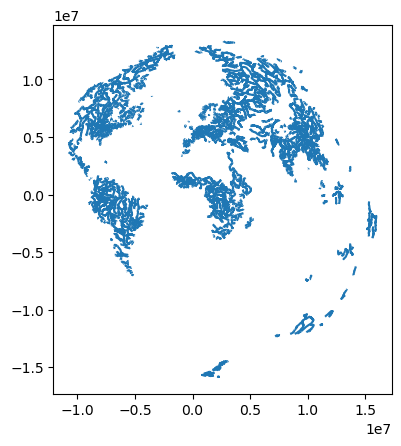

In [37]:
projected_population = gpd.read_file("projectedolaces.shp")
projected_population.plot()
projected_rivers = gpd.read_file("projected_rivers.shp")
projected_rivers.plot()

In [38]:
projected_population.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
projected_population.size/projected_population.columns.size

7343.0

In [40]:
projected_rivers.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
help(gpd.GeoSeries)

Help on class GeoSeries in module geopandas.geoseries:

class GeoSeries(geopandas.base.GeoPandasBase, pandas.core.series.Series)
 |  GeoSeries(data=None, index=None, crs=None, **kwargs)
 |  
 |  A Series object designed to store shapely geometry objects.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, scalar value
 |      The geometries to store in the GeoSeries.
 |  index : array-like or Index
 |      The index for the GeoSeries.
 |  crs : value (optional)
 |      Coordinate Reference System of the geometry objects. Can be anything accepted by
 |      :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
 |      such as an authority string (eg "EPSG:4326") or a WKT string.
 |  
 |  kwargs
 |      Additional arguments passed to the Series constructor,
 |       e.g. ``name``.
 |  
 |  Examples
 |  --------
 |  
 |  >>> from shapely.geometry import Point
 |  >>> s = geopandas.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])
 |  >>> s
 |  0    POINT (1.0

In [65]:
#creating the buffer
print(projected_rivers.crs)
rivers_buffer= projected_rivers.buffer(10000)
print(rivers_buffer.crs)
rivers_buffer_gdf = gpd.GeoDataFrame(rivers_buffer)
#rivers_buffer_gdf.set_crs('epsg:54032')
print(rivers_buffer_gdf.set_geometry(0).rename_geometry('geometry').crs)
#print(type(rivers_buffer_gdf))
#print(type(rivers_buffer.to_frame()))
#buffer from populated places
population_buffer = projected_population.buffer(10000)

PROJCS["World_Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","54032"]]
PROJCS["World_Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","54032"]]
PROJCS["Wo

In [64]:
rivers_buffer_gdf.set_geometry(0).rename_geometry('geometry')

,geometry
0,"MULTIPOLYGON (((10138551.540 3049624.556, 1013..."
1,"POLYGON ((11183514.629 2708469.621, 11184239.3..."
2,"POLYGON ((11322060.743 2548275.499, 11321592.1..."
3,"POLYGON ((2523610.596 6878389.198, 2523565.166..."
4,"POLYGON ((2491759.669 6980840.760, 2491289.873..."
...,...
1450,"POLYGON ((2535034.246 -14768011.839, 2534683.4..."
1451,"POLYGON ((634107.252 4970775.329, 635297.987 4..."
1452,None
1453,"POLYGON ((247148.376 5224039.482, 246788.137 5..."


In [63]:
rivers_buffer_gdf

,0
0,"MULTIPOLYGON (((10138551.540 3049624.556, 1013..."
1,"POLYGON ((11183514.629 2708469.621, 11184239.3..."
2,"POLYGON ((11322060.743 2548275.499, 11321592.1..."
3,"POLYGON ((2523610.596 6878389.198, 2523565.166..."
4,"POLYGON ((2491759.669 6980840.760, 2491289.873..."
...,...
1450,"POLYGON ((2535034.246 -14768011.839, 2534683.4..."
1451,"POLYGON ((634107.252 4970775.329, 635297.987 4..."
1452,None
1453,"POLYGON ((247148.376 5224039.482, 246788.137 5..."


In [42]:
population_buffer

0       POLYGON ((-5524358.943 -4466465.068, -5524407....
1       POLYGON ((-5486417.740 -4327207.242, -5486465....
2       POLYGON ((-5636960.417 -4310525.118, -5637008....
3       POLYGON ((-5379035.389 -4435724.561, -5379083....
4       POLYGON ((-5395047.121 -4379773.605, -5395095....
                              ...                        
7338    POLYGON ((-4523570.960 -2782837.179, -4523619....
7339    POLYGON ((-4859015.780 -2903590.001, -4859063....
7340    POLYGON ((8838153.443 -12379152.889, 8838105.2...
7341    POLYGON ((11567431.615 268596.058, 11567383.46...
7342    POLYGON ((11408055.840 5122887.034, 11408007.6...
Length: 7343, dtype: geometry

In [43]:
rivers_buffer.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
print(rivers_buffer.to_frame().crs)
print(rivers_buffer_gdf.crs)


None
None


In [45]:
projected_population

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,7,7,3443013.0,None,None,0,0,9.0,1159112629,POINT (-5534358.943 -4466465.068)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,7,7,3439749.0,None,None,0,0,9.0,1159112647,POINT (-5496417.740 -4327207.242)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,7,7,3442568.0,None,None,0,0,9.0,1159112663,POINT (-5646960.417 -4310525.118)
3,10,1,8,Admin-1 capital,Canelones,None,None,0,Canelones,0.0,...,6,6,3443413.0,None,None,0,0,9.0,1159112679,POINT (-5389035.389 -4435724.561)
4,10,1,8,Admin-1 capital,Florida,None,None,0,Florida,0.0,...,7,7,3442585.0,None,None,0,0,7.0,1159112703,POINT (-5405047.121 -4379773.605)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,0,600,1,Admin-1 capital,Rio de Janeiro,None,None,0,Rio de Janeiro,0.0,...,14,12,3451190.0,Rio de Janeiro,Rio de Janeiro,1,0,1.7,1159151619,POINT (-4533570.960 -2782837.179)
7339,0,600,1,Admin-1 capital,SÃ£o Paulo,None,Sao Paulo|Sio Paulo,0,Sao Paulo,0.0,...,14,14,3448439.0,S,Sao Paolo,1,0,3.0,1159151621,POINT (-4869015.780 -2903590.001)
7340,0,600,3,Admin-1 capital,Sydney,None,None,0,Sydney,0.0,...,12,12,2147714.0,Sydney,Sydney1,1,0,1.7,1159151623,POINT (8828153.443 -12379152.889)
7341,0,600,0,Admin-0 capital,Singapore,None,None,0,Singapore,1.0,...,13,12,1880252.0,Singapore,Singapore,1,5,2.1,1159151627,POINT (11557431.615 268596.058)


In [66]:
#cities within 10 km of rivers buffer 
pointsinPolys1 = gpd.tools.sjoin(projected_population, rivers_buffer_gdf.set_geometry(0).rename_geometry('geometry'), predicate = "within", how='left')
pointsinPolys1.to_csv("count_1.csv")

In [68]:
q = population_buffer.to_frame()
q

,0
0,"POLYGON ((-5524358.943 -4466465.068, -5524407...."
1,"POLYGON ((-5486417.740 -4327207.242, -5486465...."
2,"POLYGON ((-5636960.417 -4310525.118, -5637008...."
3,"POLYGON ((-5379035.389 -4435724.561, -5379083...."
4,"POLYGON ((-5395047.121 -4379773.605, -5395095...."
...,...
7338,"POLYGON ((-4523570.960 -2782837.179, -4523619...."
7339,"POLYGON ((-4859015.780 -2903590.001, -4859063...."
7340,"POLYGON ((8838153.443 -12379152.889, 8838105.2..."
7341,"POLYGON ((11567431.615 268596.058, 11567383.46..."


In [78]:
res_intersection = rivers_buffer.to_frame().set_geometry(0).overlay(q.set_geometry(0), how='intersection')
res_intersection

,geometry
0,"POLYGON ((10109298.540 3257113.535, 10109334.1..."
1,"POLYGON ((10132978.362 3033470.506, 10132961.1..."
2,"POLYGON ((10128024.701 3017082.852, 10127693.8..."
3,"POLYGON ((10111513.814 2922930.967, 10110561.2..."
4,"POLYGON ((10102793.021 3225143.052, 10102462.1..."
...,...
2449,"POLYGON ((660234.318 5005597.825, 660289.060 5..."
2450,"POLYGON ((343682.726 5109674.409, 343676.896 5..."
2451,"POLYGON ((379670.909 5045906.978, 379717.343 5..."
2452,"POLYGON ((279956.838 5206598.250, 279812.843 5..."


In [79]:
print(type(res_intersection))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [81]:
res_intersection.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

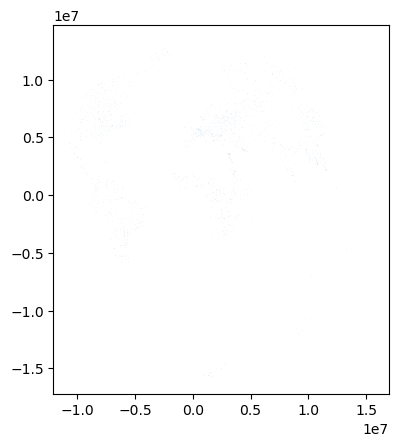

In [80]:
res_intersection.plot()

In [85]:
fiona.supported_drivers['KML'] = 'rw'
res_intersection.to_file('Intersection1.kml',driver='KML')

C:\Users\RAMBABU\anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [86]:
rivers_buffer_gdf.set_geometry(0).to_file('River_buf.kml',driver='KML')
q.set_geometry(0).to_file('Cities_buf.kml',driver='KML')

C:\Users\RAMBABU\anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\RAMBABU\anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

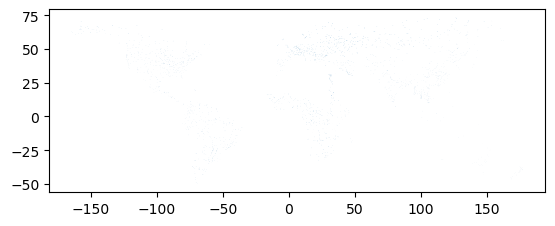

In [89]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
kml_df = gpd.read_file('Intersection1.kml',driver='KML')
kml_df.plot()